A cooling coffee cup model 

https://uncertainpy.readthedocs.io/en/latest/examples/coffee_cup.html#coffee-cup

$dT(t)/d(t) = -k(T(t) - Tenv)$

In [3]:
!pip install uncertainpy chaospy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 19.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 13.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import uncertainpy as un
import chaospy as cp # to create distributions
import numpy as np
from scipy.integrate import odeint

/Users/k.rahman.3/.conda/envs/qc_ops_central_data_science/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [6]:
## creating the coffee cup model

def coffee_cup(kappa,T_env):
    time = np.linspace(0,200,150)     #Minutes
    T_0 = 95                          # initial temp
    
    def f(T,kappa,T_env):
        return -kappa * (T-T_env)
    
    temperature = odeint(f,T_0,time,args=(kappa,T_env))[:,0]
    return time, temperature


In [7]:
model = un.Model(run=coffee_cup, labels=["Time (min)", "Temperature (C)"])

In [9]:
# Create the distributions
kappa_dist = cp.Uniform(0.025, 0.075)
T_env_dist = cp.Uniform(15, 25)

# Define the parameter dictionary
parameters = {"kappa": kappa_dist, "T_env": T_env_dist}

In [10]:
# Set up the uncertainty quantification
UQ = un.UncertaintyQuantification(model=model, parameters=parameters)

In [12]:
import uncertainpy as un
import chaospy as cp                       # To create distributions
import numpy as np                         # For the time array
from scipy.integrate import odeint         # To integrate our equation


# Create the coffee cup model function
def coffee_cup(kappa, T_env):
    # Initial temperature and time array
    time = np.linspace(0, 200, 150)            # Minutes
    T_0 = 95                                   # Celsius

    # The equation describing the model
    def f(T, time, kappa, T_env):
        return -kappa*(T - T_env)

    # Solving the equation by integration
    temperature = odeint(f, T_0, time, args=(kappa, T_env))[:, 0]

    # Return time and model output
    return time, temperature


# Create a model from the coffee_cup function and add labels
model = un.Model(run=coffee_cup, labels=["Time (min)", "Temperature (C)"])

# Create the distributions
kappa_dist = cp.Uniform(0.025, 0.075)
T_env_dist = cp.Uniform(15, 25)

# Define the parameter dictionary
parameters = {"kappa": kappa_dist, "T_env": T_env_dist}

# Set up the uncertainty quantification
UQ = un.UncertaintyQuantification(model=model, parameters=parameters)

# Perform the uncertainty quantification using
# polynomial chaos with point collocation (by default)
# We set the seed to easier be able to reproduce the result
data = UQ.quantify(seed=10)


chaospy.orth_ttr name is to be deprecated; Use chaospy.expansion.stieltjes instead
Calculating statistics from PCE: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.24s/it]


Saving data as: data/coffee_cup.h5


In [14]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

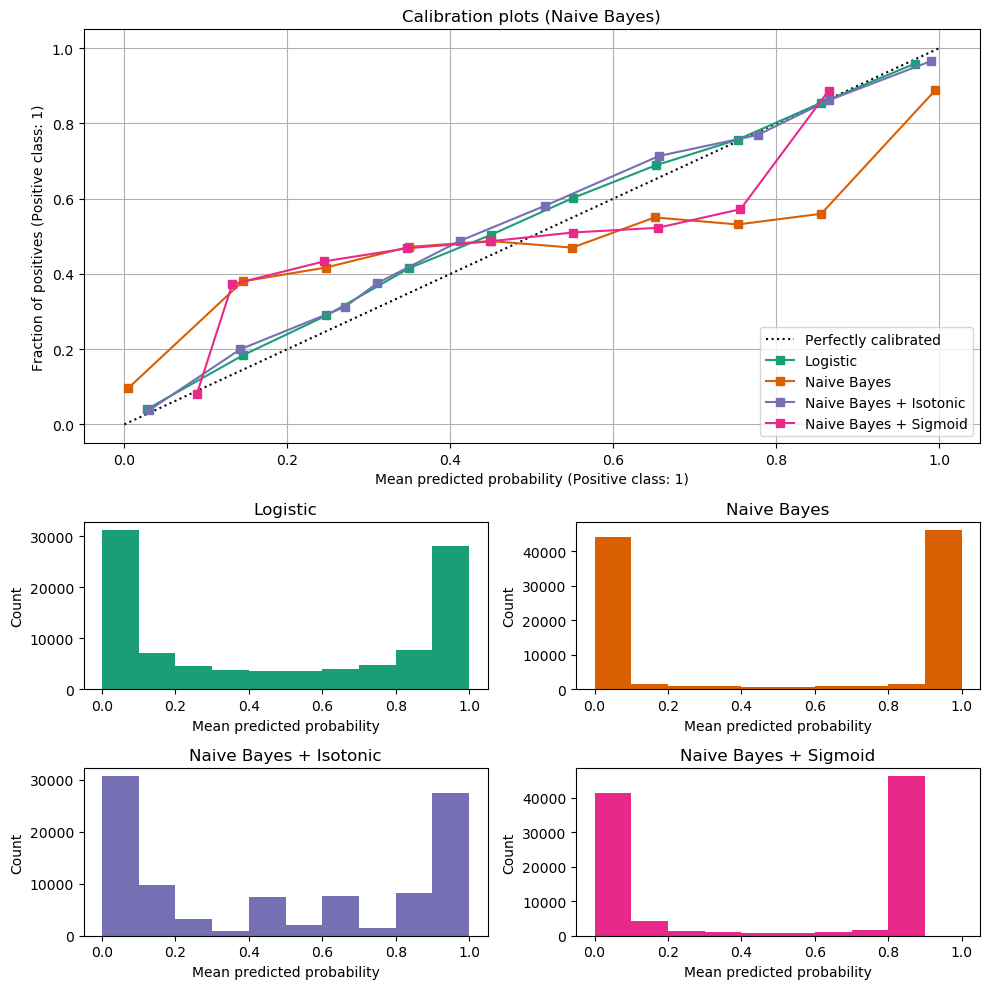

In [17]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()
